In [1]:
import os

import csv

import torch
import torch.utils.data
from PIL import Image


print(os.listdir(r"D:\Datasets\Glycoma dataset 1 - 6gb\ORIGA\Images_Square"))

allRows = []
with open(r"D:\Datasets\Glycoma dataset 1 - 6gb\ORIGA\OrigaList.csv") as file:
    myData = csv.reader(file)
    for row in myData:
        allRows.append(row)

print(allRows)



img = Image.open(r"D:\Datasets\Glycoma dataset 1 - 6gb\ORIGA\Images_Square\001.jpg")
print(img)



['001.jpg', '002.jpg', '003.jpg', '004.jpg', '005.jpg', '006.jpg', '007.jpg', '008.jpg', '009.jpg', '010.jpg', '011.jpg', '012.jpg', '013.jpg', '014.jpg', '015.jpg', '016.jpg', '017.jpg', '018.jpg', '019.jpg', '020.jpg', '021.jpg', '022.jpg', '023.jpg', '024.jpg', '025.jpg', '026.jpg', '027.jpg', '028.jpg', '029.jpg', '030.jpg', '031.jpg', '032.jpg', '033.jpg', '034.jpg', '035.jpg', '036.jpg', '037.jpg', '038.jpg', '039.jpg', '040.jpg', '041.jpg', '042.jpg', '043.jpg', '044.jpg', '045.jpg', '046.jpg', '047.jpg', '048.jpg', '049.jpg', '050.jpg', '051.jpg', '052.jpg', '053.jpg', '054.jpg', '055.jpg', '056.jpg', '057.jpg', '058.jpg', '059.jpg', '060.jpg', '061.jpg', '062.jpg', '063.jpg', '064.jpg', '065.jpg', '066.jpg', '067.jpg', '068.jpg', '069.jpg', '070.jpg', '071.jpg', '072.jpg', '073.jpg', '074.jpg', '075.jpg', '076.jpg', '077.jpg', '078.jpg', '079.jpg', '080.jpg', '081.jpg', '082.jpg', '083.jpg', '084.jpg', '085.jpg', '086.jpg', '087.jpg', '088.jpg', '089.jpg', '090.jpg', '091.jpg'

In [2]:


import torchvision.transforms as transforms



transform = transforms.Compose([transforms.ToTensor()])



path = r"D:\Datasets\Glycoma dataset 1 - 6gb\ORIGA\Images_Square"
dataAndLables = []



for indx,img in enumerate(os.listdir(path)):
    imgTensor = transform(Image.open(path+"\\"+img))
    if(allRows[indx+1][1]==img):
        label = torch.tensor(int(allRows[indx+1][4]))
        dataAndLables.append((imgTensor, label))

    else:
        print(img)
        break




print(dataAndLables[0])



(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor(0))


In [3]:
# print(dataAndLables[0][0])
print(torch.max(dataAndLables[0][0]))
print(torch.min(dataAndLables[0][0]))
print(dataAndLables[0][0].shape)
print(dataAndLables[0][0].dtype)
print(len(dataAndLables))




tensor(1.)
tensor(0.)
torch.Size([3, 512, 512])
torch.float32
650


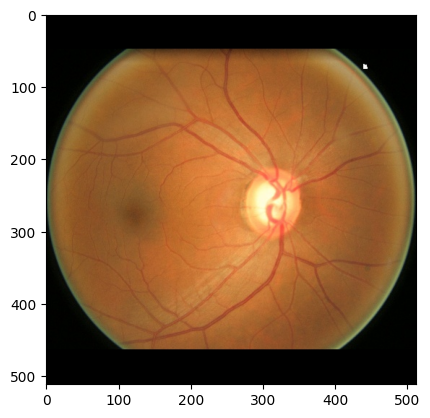

In [4]:
import matplotlib.pyplot as plt

plt.imshow(dataAndLables[0][0].permute(1,2,0))

In [5]:
imgLabelPairDict = {}
for dataPoint in dataAndLables:
    imgLabelPairDict[dataPoint[0]] = dataPoint[1]

# print(imgLabelPairDict)
print(dataAndLables.__len__())
print(imgLabelPairDict.__len__())

# remember dataAndLables is list of tuples while the key for the dict is the image itself 
print(imgLabelPairDict.get(dataAndLables[644][0]))
print(dataAndLables[644][0].shape)




650
650
tensor(1)
torch.Size([3, 512, 512])


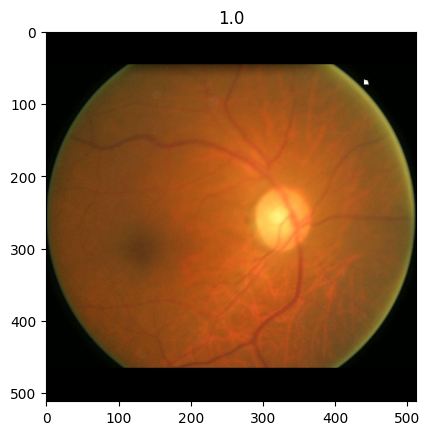

In [6]:
from torch.utils.data import Dataset
import torchvision.transforms as tt
# see youtube vid about how to create custom datasets
# https://www.analyticsvidhya.com/blog/2021/09/torch-dataset-and-dataloader-early-loading-of-data/
# https://youtu.be/NVxCKdp0NhQ
class CustomDS(Dataset):
    def __init__(self, dataAndLables):
        self.dataAndLabels = dataAndLables
        

    def __len__(self):
        return len(self.dataAndLabels)
    
    def __getitem__(self, index):
        img = self.dataAndLabels[index][0]
        label = self.dataAndLabels[index][1]
        return img,torch.Tensor([label])
    

ds = CustomDS(dataAndLables)

dataloader = torch.utils.data.DataLoader(ds, batch_size=36, shuffle=False)

toPil = tt.ToPILImage()

for img,label in dataloader:
    plt.title(label=label[35].item())
    plt.imshow(toPil(img[35]))
    break


#checked the customDS and dataloader, and they were tested/crosschecked to be found ok, img 36 in OG dataset is with glycoma and the label we got from dataloader is 1

In [7]:

train_ds, test_ds = torch.utils.data.random_split(dataset=ds, lengths=[0.7,0.3])
print(len(train_ds))
print(len(test_ds))
print(len(train_ds) + len(test_ds))

455
195
650


In [8]:
import torchvision.transforms as tt
train_transforms = tt.Compose([
    tt.ToPILImage(),
    tt.RandomHorizontalFlip(),
    tt.RandomVerticalFlip(),
    tt.ToTensor()
])

toPIL = tt.ToPILImage()

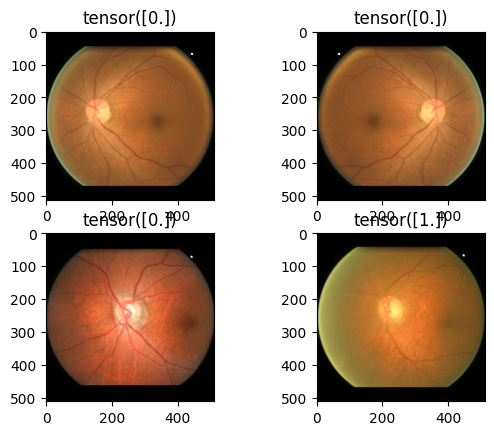

In [9]:
trainLoader = torch.utils.data.DataLoader(train_ds, 4, shuffle=True,)
testLoader = torch.utils.data.DataLoader(test_ds, 4, shuffle=False,)

#lets see if we can apply our transforms
for img,label in trainLoader:

    transformed_imgs_batch = [train_transforms(one_img) for one_img in img] #train_transforms can only take one img at a time

    plt.subplot(2,2,1)
    plt.title(label=label[0])
    plt.imshow(img[0].permute(1,2,0))

    plt.subplot(2,2,2)
    plt.title(label[0])
    plt.imshow(transformed_imgs_batch[0].permute(1,2,0)) # applying/testing our trnsform func, FIRST APPLY the transforms func then apply the .premute()

    plt.subplot(2,2,3)
    plt.title(label[2])
    plt.imshow(img[2].permute(1,2,0))

    plt.subplot(2,2,4)
    plt.title(label[3])
    plt.imshow(img[3].permute(1,2,0))

    break

In [10]:
import torch.nn as nn
import torch.functional as F

In [11]:

class CNNModel(nn.Module):
    def __init__(self):
        super().__init__()
        layers = []
        self.conv_net = nn.Sequential(

            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(4),

            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(4),
            
            )
        
        self.feedforward = nn.Sequential(

            nn.Flatten(),

            nn.Linear(16384, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        out = self.conv_net(x)
        out = self.feedforward(out)
        return out

In [12]:
model = CNNModel()
total_params = sum(p.numel() for p in model.parameters())
print(f"Number of parameters: {total_params}")

Number of parameters: 977281


In [13]:
for img,lable in trainLoader:
    print(img.shape)
    print(label)
    print(f"Model output shape = {model(img).shape} & label shape = {label.shape}")
    print(model(img))
    break

torch.Size([4, 3, 512, 512])
tensor([[0.],
        [0.],
        [0.],
        [1.]])
Model output shape = torch.Size([4, 1]) & label shape = torch.Size([4, 1])
tensor([[0.4996],
        [0.4994],
        [0.4998],
        [0.4991]], grad_fn=<SigmoidBackward0>)


In [14]:
x = 1
print(torch.tensor(x))
print(torch.Tensor(x))

b = [1,2,3]
print(torch.Tensor(b))

c = [[1],[2],[3]]
print(torch.Tensor(c))

d = [[[1,5],[1,5]],[[2,5],[2,5]]]
print(torch.Tensor(d))

tensor(1)
tensor([-987120.])
tensor([1., 2., 3.])
tensor([[1.],
        [2.],
        [3.]])
tensor([[[1., 5.],
         [1., 5.]],

        [[2., 5.],
         [2., 5.]]])


In [15]:
import torch.nn.functional as F

F.binary_cross_entropy(torch.Tensor([[0.1],[0.2],[0.3]]), torch.Tensor([[0],[0],[0]]))

tensor(0.2284)

In [19]:
import torch.nn.functional as F

class CompleteCNNPakage(CNNModel):
    def train_step(self, input_batch, actual_outputs, loss_func):
        print(f"Actual output shape = {actual_outputs.shape}")
        pred = self(input_batch)
        loss = loss_func(pred, actual_outputs)
        return loss
    
    def accuracy(self, outputs, labels):
        preds = torch.Tensor([[round(x.item())]  for x in outputs]) #the preds should be of shape [4,1]
        acc = torch.sum(preds == labels).item() / len(preds)
        preds = None
        return acc
    
    def validation(self, trainLoader, loss_func):
        losses_sum = 0
        accuracies_sum = 0
        counter = 0
        self.eval()
        for imgs, labels in trainLoader:
            predictions = self(imgs)

            loss  = loss_func(predictions, labels)
            losses_sum += loss

            acc = self.accuracy(predictions, labels)
            accuracies_sum += acc

            counter += 1

            avg_acc = accuracies_sum/counter
            avg_loss = losses_sum/counter

            print(f" avg_acc = {avg_acc}")
        
        return avg_acc,avg_loss
    
    

#lets make a function to do transforms on a batch of images insead of doing it manually in the 'fit' function
def transform_img_batch(img_batch, train_transforms):
    
    with torch.no_grad():
        transformed_batch = []
        for indx, img in enumerate(img_batch):
            transformed_batch.append(train_transforms(img))
        
    return torch.stack(transformed_batch) # IMP!!!! use torch.stack which stacks up tensors! DO NOT USE torch.Tensors, it will give Value error
 
def fit_model(model, lr, trainLoader, epochs, opt=torch.optim.Adam, train_transforms=train_transforms, loss_func = F.binary_cross_entropy,):

    optimizer = opt(model.parameters(), lr,)

    for epoch in range(epochs):
        model.train()
        
        
        for imgs, labels in trainLoader:
            imgs = transform_img_batch(imgs, train_transforms)
            # print(f"transformed imgs shape = {imgs.shape}")
            loss = model.train_step( imgs, labels, loss_func)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            print(loss.item())



    acc,loss = model.validation(trainLoader, loss_func)
    print("Done! Accuracy: {acc} & Loss: {loss}")

    

        





In [20]:
model = CompleteCNNPakage()

model

CompleteCNNPakage(
  (conv_net): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (feedforward): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=16384, out_features=1, bias=True)
    (2): Sigmoid()
  )
)

In [22]:
fit_model(model, 0.000001, trainLoader, 1,)
# working confirmed!

Actual output shape = torch.Size([4, 1])
0.5795210003852844
Actual output shape = torch.Size([4, 1])
0.580914318561554
Actual output shape = torch.Size([4, 1])
0.6445052623748779
Actual output shape = torch.Size([4, 1])
0.6407285332679749
Actual output shape = torch.Size([4, 1])
0.6385939121246338
Actual output shape = torch.Size([4, 1])
0.6399279832839966
Actual output shape = torch.Size([4, 1])
0.6976169347763062
Actual output shape = torch.Size([4, 1])
0.6977556943893433
Actual output shape = torch.Size([4, 1])
0.6301892995834351
Actual output shape = torch.Size([4, 1])
0.5748332738876343
Actual output shape = torch.Size([4, 1])


KeyboardInterrupt: 

In [24]:
#lets clear memeory:
allRows = None
dataAndLables = None
imgLabelPairDict = None
ds = None
test_ds = None
train_ds = None

import gc
print(gc.collect())



model.validation(testLoader, F.binary_cross_entropy)

0
 avg_acc = 0.75
 avg_acc = 0.75
 avg_acc = 0.8333333333333334
 avg_acc = 0.8125
 avg_acc = 0.75
 avg_acc = 0.7083333333333334
 avg_acc = 0.6785714285714286
 avg_acc = 0.65625
 avg_acc = 0.6944444444444444
 avg_acc = 0.725
 avg_acc = 0.7272727272727273
 avg_acc = 0.7291666666666666
 avg_acc = 0.7115384615384616
 avg_acc = 0.7142857142857143
 avg_acc = 0.7333333333333333
 avg_acc = 0.71875
 avg_acc = 0.7058823529411765
 avg_acc = 0.6944444444444444
 avg_acc = 0.6973684210526315
 avg_acc = 0.7125
 avg_acc = 0.7261904761904762
 avg_acc = 0.7386363636363636
 avg_acc = 0.7282608695652174
 avg_acc = 0.7395833333333334
 avg_acc = 0.74
 avg_acc = 0.75
 avg_acc = 0.7407407407407407
 avg_acc = 0.7321428571428571


RuntimeError: [enforce fail at ..\c10\core\impl\alloc_cpu.cpp:72] data. DefaultCPUAllocator: not enough memory: you tried to allocate 268435456 bytes.